In [1]:
import numpy as np
import matplotlib.pyplot as plt
from update_utils import *
from retraction_free import *
from RDGD_tracking import *
from ret_free_destiny import *
from ret_deepca import *
import time

In [2]:
m = 10000
# number of samples ?
n = 500
# problem dim
# n_r_ratio = 100
# r = int(n/n_r_ratio)
# r = 10
r = int(n/2)
eig_rank = n
# rank
# max_iter = 10000

exp_num = 1
# number of experiments

In [3]:

# print(x_0.shape)
# print(X_0.shape)

A = data_gen_pca(1, n, m)/np.sqrt(m)
B = np.zeros((m, n))
B = A[0].T
print(np.linalg.norm(A))
print(np.linalg.norm(B))

U, S, V = np.linalg.svd(B, full_matrices=False)
print(U.shape, S.shape, V.shape)
for i in range(n):
    if eig_rank >= i:
    # if True:
        S[i] = S[0] * 0.5**(i)
    else:
        S[i] = 0
B = U@np.diag(S)@V
print(np.linalg.norm(B))

A[0] = B.T
    
A_m = np.zeros((n,n))
for i in range(1):
    A_m += A[i]@A[i].T
    


22.353668295218426
22.353668295218426
(10000, 500) (500,) (500, 500)
1.410109517229878


In [4]:

x_opt, s, v = np.linalg.svd(A_m)

x_opt = x_opt[:, :r]

# print(x_opt.T@x_opt)
print(x_opt.shape)
print(x_opt[0])

print(np.sum(np.sum(x_opt.T@A_m@x_opt)))


(500, 250)
[-1.86954426e-02 -2.20650097e-02 -4.72614661e-02  9.08268135e-02
 -1.87394961e-03  5.24237655e-02 -9.64223393e-03 -5.38699630e-02
  1.30275982e-02  8.47512124e-02  5.32341720e-02  6.33809185e-03
  2.32747120e-02 -6.47375583e-03 -2.19528327e-02 -1.42946514e-02
  6.26324947e-02 -4.05808744e-02  5.31370536e-02  4.57297734e-03
  3.53446070e-02  5.73577053e-02  1.24152691e-01  1.18450926e-03
  1.06996153e-01 -2.74852178e-01 -1.68892399e-01  7.53045111e-02
 -2.88859833e-01 -4.35956972e-01 -9.15925537e-03  2.45585404e-01
  4.32431942e-02 -5.92677620e-01 -7.88775853e-02 -2.11964205e-01
 -6.81722224e-02  1.00375845e-01 -9.28166239e-03  2.16461944e-02
 -5.86737608e-02  2.97392933e-02  5.36457507e-02  2.02284505e-02
  5.23457559e-03 -1.90353182e-02 -4.21674009e-02 -8.39466038e-02
  6.28858982e-02  6.35221888e-04  3.35288847e-02  9.03107346e-03
  2.92002561e-02  5.79232363e-03  6.19856060e-03  7.25582088e-03
  1.10285612e-02 -2.79335287e-02  4.01453432e-02  2.12970762e-02
 -3.85673768e-

In [5]:

    
x_0 = np.random.randn(n, r)
x_0, _ = np.linalg.qr(x_0)


print(A[0].shape)

step_size = .001
# distance, x_bar = ret_free_tracking(A, W, step_size, X_0, x_opt, max_iter=10000)
# distance = ret_free_tracking(A, W, step_size, X_0, x_opt)    

(500, 10000)


In [6]:

max_iter=50000
distances = []
con_errors = []
grad_norms = []
x_bars = []
labels = []
time_methods = [time.time()]


In [8]:
distance = []
con_errors = []
grad_norms = []


lambd = 0.1
beta = 1

x = np.copy(x_0)
y = np.zeros_like(x_0)
grad = np.zeros_like(x_0)
diff = np.zeros_like(x_0)
penalty = np.zeros_like(x_0)


all_start = time.time()
retraction_time = 0
communication_time = 0
gradient_time = 0
logging_time = 0


for iter in tqdm(range(max_iter)):

    diff = A[0]@A[0].T@x

    grad = proj_tangent(x, diff)
    penalty = lambd * x @ (x.T@x - np.eye(r))


    x += step_size * (grad - penalty)


    dist = np.linalg.norm(x.T@x- np.eye(r), ord='fro')  
    distance.append(dist)
    grad_norm = np.linalg.norm(grad)
    grad_norms.append(grad_norm)
    




  1%|          | 515/50000 [00:07<12:31, 65.86it/s] 


KeyboardInterrupt: 

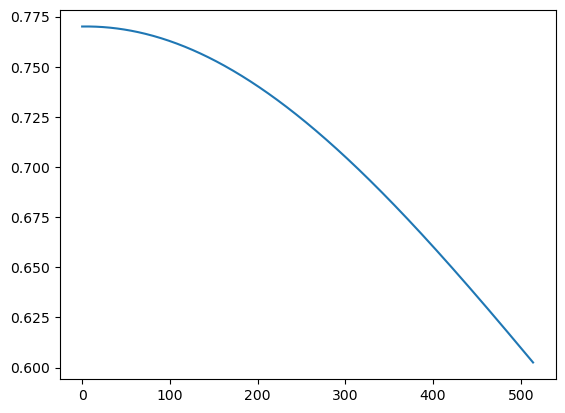

In [9]:
plt.plot(grad_norms)

In [10]:

distance1, con_error1, grad_norm1, x_bar1 = ret_free_tracking(A, comm_W, step_size, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
time_methods.append(time.time() - sum(time_methods))
labels.append("DRFGT")
distances.append(distance1)
con_errors.append(con_error1)
grad_norms.append(grad_norm1)
x_bars.append(x_bar1)

# distance1, con_error1, grad_norm1, x_bar1 = DeePCA(A, comm_W, step_size, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
# time_methods.append(time.time() - sum(time_methods))
# labels.append("DeEPCA")
# distances.append(distance1)
# con_errors.append(con_error1)
# grad_norms.append(grad_norm1)
# x_bars.append(x_bar1)

distance1, con_error1, grad_norm1, x_bar1 = DESTINY(A, comm_W, step_size*0.1, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
# distance1, con_error1, grad_norm1, x_bar1 = DESTINY(A, W, 0.001, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
time_methods.append(time.time() - sum(time_methods))
labels.append("DESTINY")
distances.append(distance1)
con_errors.append(con_error1)
grad_norms.append(grad_norm1)
x_bars.append(x_bar1)


100%|██████████| 50000/50000 [01:08<00:00, 726.59it/s]


total time: 68.82241988182068
retraction_time time: 0
communication_time time: 39.31093716621399
gradient time: 20.13474678993225
logging_time time: 7.9970173835754395
1


100%|██████████| 50000/50000 [01:02<00:00, 804.67it/s]

total time: 62.14049792289734
retraction_time time: 0
communication_time time: 27.999345541000366
gradient time: 27.887352466583252
logging_time time: 3.7827343940734863


In [22]:


distance1, con_error1, grad_norm1, x_bar1 = RDGD_tracking(A, comm_W, step_size, X_0, x_opt, max_iter=max_iter, lin_term=lin_term)
time_methods.append(time.time() - sum(time_methods))
labels.append("DRGTA")
distances.append(distance1)
con_errors.append(con_error1)
grad_norms.append(grad_norm1)
x_bars.append(x_bar1)

print(time_methods[1:])

100%|██████████| 50000/50000 [01:47<00:00, 465.24it/s]

total time: 107.47363948822021
retraction_time time: 48.12774920463562
communication_time time: 34.77598571777344
gradient time: 15.120247602462769
logging_time time: 8.09023380279541
[68.83513236045837, 62.145498275756836, 2664.3910915851593]


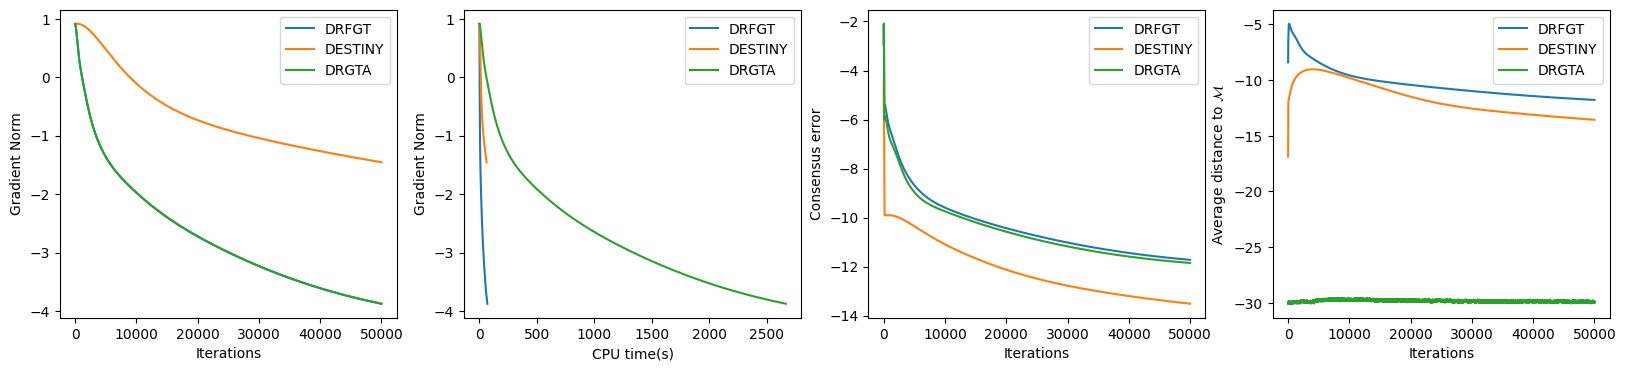

In [23]:
# label1 = "DRFGT (This paper)"
# # label2 = "DRGTA (Chen et al. 2021a)"
# label2 = "DESTINY"
# labels = [
#     "DRFGT (This paper)",
#     "DESTINY",
#     "DRGTA",
# ]

f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(20,4))


for i in range(len(labels)):
    # if labels[i] == "DESTINY":
    #     continue
    if labels[i] == "DeEPCA":
        continue
        comm_step = 30
        ax1.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(grad_norms[i]), label=labels[i])
        ax2.plot(np.linspace(0, comm_step *time_methods[i+1], grad_norms[i].shape[0]), 
                np.log(grad_norms[i]), label=labels[i])
        ax3.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(con_errors[i]), label=labels[i])
        ax4.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(distances[i]), label=labels[i])
    else:
        ax1.plot(np.log(grad_norms[i]), label=labels[i])
        ax2.plot(np.linspace(0, time_methods[i+1], grad_norms[i].shape[0]), 
                np.log(grad_norms[i]), label=labels[i])
        ax3.plot(np.log(con_errors[i]), label=labels[i])
        ax4.plot(np.log(distances[i]), label=labels[i])
        # ax1.plot((grad_norms[i]), label=labels[i])
        # ax2.plot(np.linspace(0, time_methods[i+1], grad_norms[i].shape[0]), 
        #         (grad_norms[i]), label=labels[i])
        # ax3.plot((con_errors[i]), label=labels[i])
        # ax4.plot((distances[i]), label=labels[i])


ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
ax1.legend()


ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")

# ax2.set_title("Elapsed Time")
ax2.legend()


ax3.set_ylabel("Consensus error")
ax3.set_xlabel("Iterations")
ax3.legend()


ax4.set_ylabel("Average distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
# ax4.set_ylim(-10,5)
# ax1.set_xlim(0,2000)
# # ax2.set_xlim(0,10)
# ax3.set_xlim(0,2000)
# ax4.set_xlim(0,1000)
# ax4.set_title("distance")
ax4.legend()



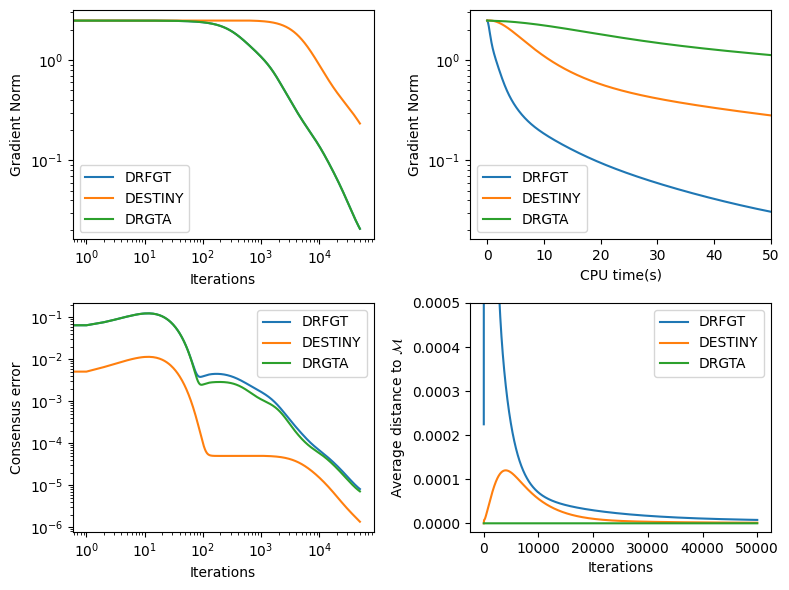

In [35]:
# label1 = "DRFGT (This paper)"
# # label2 = "DRGTA (Chen et al. 2021a)"
# label2 = "DESTINY"
# labels = [
#     "DRFGT (This paper)",
#     "DESTINY",
#     "DRGTA",
# ]

# f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(20,4))
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(8,6))


for i in range(len(labels)):
    # if labels[i] == "DESTINY":
    #     continue
    if labels[i] == "DeEPCA":
        continue
        comm_step = 30
        ax1.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(grad_norms[i]), label=labels[i])
        ax2.plot(np.linspace(0, comm_step *time_methods[i+1], grad_norms[i].shape[0]), 
                np.log(grad_norms[i]), label=labels[i])
        ax3.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(con_errors[i]), label=labels[i])
        ax4.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(distances[i]), label=labels[i])
    else:
        ax1.plot((grad_norms[i]), label=labels[i])
        ax2.plot(np.linspace(0, time_methods[i+1], grad_norms[i].shape[0]), 
                (grad_norms[i]), label=labels[i])
        ax3.plot((con_errors[i]), label=labels[i])
        ax4.plot((distances[i]), label=labels[i])
        # ax1.plot((grad_norms[i]), label=labels[i])
        # ax2.plot(np.linspace(0, time_methods[i+1], grad_norms[i].shape[0]), 
        #         (grad_norms[i]), label=labels[i])
        # ax3.plot((con_errors[i]), label=labels[i])
        # ax4.plot((distances[i]), label=labels[i])


ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
ax1.legend()
ax1.set_xscale('log')
ax1.set_yscale('log')

ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")

# ax2.set_title("Elapsed Time")
ax2.legend()
ax2.set_xlim(-3,50)
ax2.set_yscale('log')


ax3.set_ylabel("Consensus error")
ax3.set_xlabel("Iterations")
ax3.legend()
ax3.set_xscale('log')
ax3.set_yscale('log')

ax4.set_ylabel("Average distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
ax4.set_ylim(-2e-5, 5e-4)
# ax1.set_xlim(0,2000)
# # ax2.set_xlim(0,10)
# ax3.set_xlim(0,2000)
# ax4.set_xlim(0,1000)
# ax4.set_title("distance")
ax4.legend()
# ax4.set_xscale('log')
# ax4.set_yscale('log')
f.tight_layout()
# plt.savefig("Procrustes_quad_lin4.pdf")

In [14]:

# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.savefig("methods_compare_d"+str(n)+"r"+str(r)+"N"+str(N)+".pdf")

In [15]:

# plt.plot(np.log(distance1), label='gradient tracking')
# plt.plot(np.log(distance2), label='RDGD')


# print(np.sum(np.sum(x_opt.T@A_m@x_opt)))
# print(np.sum(np.sum(x_bar1.T@A_m@x_bar1)))
# # print(np.sum(np.sum(x_bar2.T@A_m@x_bar2)))
# plt.title("distance")
# plt.legend()

In [16]:

# plt.plot(np.log(grad_norm1), label='gradient tracking')
# plt.plot(np.log(grad_norm2), label='RDGD')


# plt.title("avg grad norm")
# plt.legend()

In [17]:

# plt.plot(np.log(con_error1), label='gradient tracking')
# plt.plot(np.log(con_error2), label='RDGD')

# plt.title("consensus error")
# plt.legend()

In [18]:
# label1 = "DRFGT (This paper)"
# label2 = "DRGTA (Chen et al. 2021a)"
# labels = [
#     "DRFGT (This paper)",
#     "DESTINY",
#     # "DRGTA (Chen et al. 2021a)",
#     "DRGTA",
# ]

# f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2, figsize=(10,6))


# ax1.plot(np.log(grad_norm1), label=label1)
# ax1.plot(np.log(grad_norm2), label=label2)
# ax1.set_ylabel("Gradient Norm")
# ax1.set_xlabel("Iterations")
# # ax1.set_title("Optimality")
# ax1.legend()

# ax2.plot(np.linspace(0, time1, grad_norm1.shape[0]), np.log(grad_norm1), label=label1)
# ax2.plot(np.linspace(0, time2, grad_norm2.shape[0]), np.log(grad_norm2), label=label2)
# # ax2.set_ylabel("$\sum_{i\in [n]}\\text{grad} f_i(x_i)$")
# ax2.set_ylabel("Gradient Norm")
# ax2.set_xlabel("CPU time(s)")

# # ax2.set_title("Elapsed Time")
# ax2.legend()


# ax3.plot(np.log(con_error1), label=label1)
# ax3.plot(np.log(con_error2), label=label2)
# ax3.set_ylabel("Consensus error")
# ax3.set_xlabel("Iterations")
# ax3.legend()



# ax4.plot(np.log(distance1), label=label1)
# ax4.plot(np.log(distance2), label=label2)
# ax4.set_ylabel("Average distance to $\\mathcal{M}$")
# ax4.set_xlabel("Iterations")
# # ax4.set_title("distance")
# ax4.legend()


# # ax1.set_title('Sharing Y axis')
# # ax2.scatter(x, y)
# # plt.savefig("quad_compare.pdf")

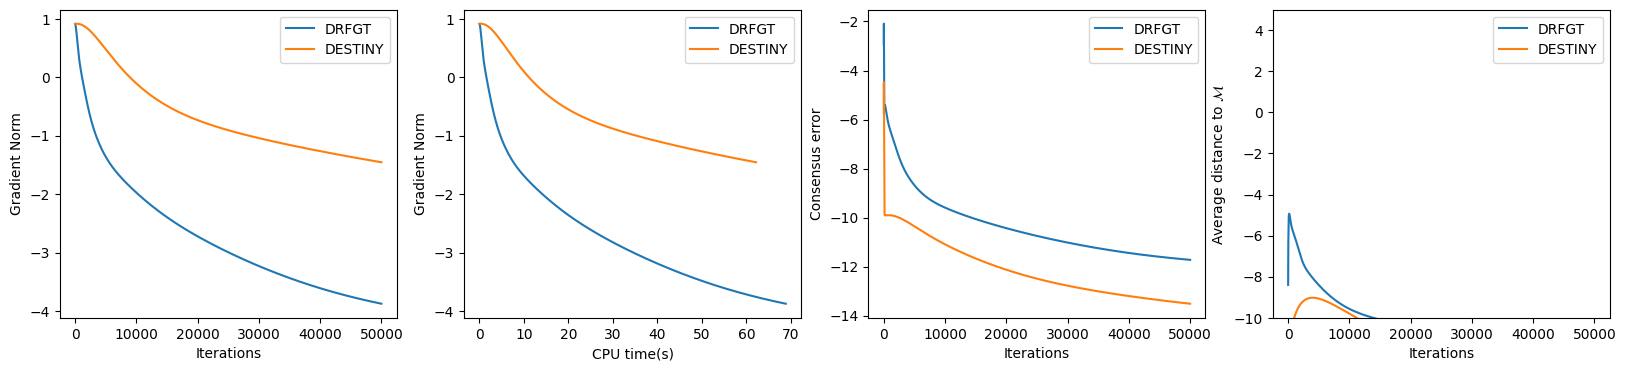

In [19]:
# label1 = "DRFGT (This paper)"
# # label2 = "DRGTA (Chen et al. 2021a)"
# label2 = "DESTINY"
# labels = [
#     "DRFGT (This paper)",
#     "DESTINY",
#     "DRGTA",
# ]

f, ((ax1, ax2, ax3, ax4)) = plt.subplots(1,4, figsize=(20,4))


for i in range(len(labels)):
    if labels[i] == "DeEPCA":
        comm_step = 1
        ax1.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(grad_norms[i]), label=labels[i])
        ax2.plot(np.linspace(0, comm_step *time_methods[i+1], grad_norms[i].shape[0]), 
                np.log(grad_norms[i]), label=labels[i])
        ax3.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(con_errors[i]), label=labels[i])
        ax4.plot(np.linspace(0, comm_step * grad_norms[i].shape[0], grad_norms[i].shape[0]), 
                 np.log(distances[i]), label=labels[i])
    else:
        ax1.plot(np.log(grad_norms[i]), label=labels[i])
        ax2.plot(np.linspace(0, time_methods[i+1], grad_norms[i].shape[0]), 
                np.log(grad_norms[i]), label=labels[i])
        ax3.plot(np.log(con_errors[i]), label=labels[i])
        ax4.plot(np.log(distances[i]), label=labels[i])



# ax1.plot(np.log(grad_norm1), label=label1)
# ax1.plot(np.log(grad_norm2), label=label2)
ax1.set_ylabel("Gradient Norm")
ax1.set_xlabel("Iterations")
# ax1.set_title("Optimality")
ax1.legend()

# ax2.plot(np.linspace(0, time1, grad_norm1.shape[0]), np.log(grad_norm1), label=label1)
# ax2.plot(np.linspace(0, time2, grad_norm2.shape[0]), np.log(grad_norm2), label=label2)
# ax2.set_ylabel("$\sum_{i\in [n]}\\text{grad} f_i(x_i)$")
ax2.set_ylabel("Gradient Norm")
ax2.set_xlabel("CPU time(s)")

# ax2.set_title("Elapsed Time")
ax2.legend()


# ax3.plot(np.log(con_error1), label=label1)
# ax3.plot(np.log(con_error2), label=label2)
ax3.set_ylabel("Consensus error")
ax3.set_xlabel("Iterations")
ax3.legend()



# ax4.plot(np.log(distance1), label=label1)
# ax4.plot(np.log(distance2), label=label2)
ax4.set_ylabel("Average distance to $\\mathcal{M}$")
ax4.set_xlabel("Iterations")
ax4.set_ylim(-10,5)
# ax1.set_xlim(0,2000)
# # ax2.set_xlim(0,10)
# ax3.set_xlim(0,2000)
# ax4.set_xlim(0,1000)
# ax4.set_title("distance")
ax4.legend()


# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)
# plt.savefig("methods_compare_d"+str(n)+"r"+str(r)+"N"+str(N)+".pdf")

NameError: name 'con_error2' is not defined

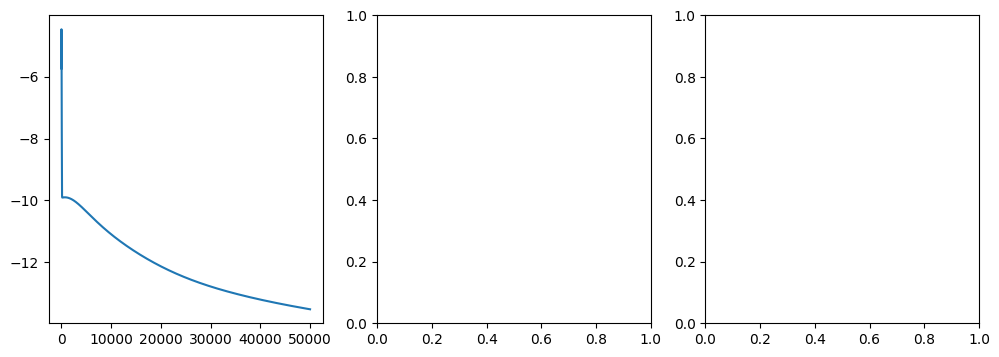

In [20]:
f, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4))
ax1.plot(np.log(con_error1), label='gradient tracking')
ax1.plot(np.log(con_error2), label='RDGD')

ax1.set_title("consensus error")
ax1.legend()


ax2.plot(np.log(grad_norm1), label='gradient tracking')
ax2.plot(np.log(grad_norm2), label='RDGD')
ax2.set_title("avg grad norm")
ax2.legend()

ax3.plot(np.log(distance1), label='gradient tracking')
ax3.plot(np.log(distance2), label='RDGD')
ax3.set_title("distance")
ax3.legend()


# ax1.set_title('Sharing Y axis')
# ax2.scatter(x, y)

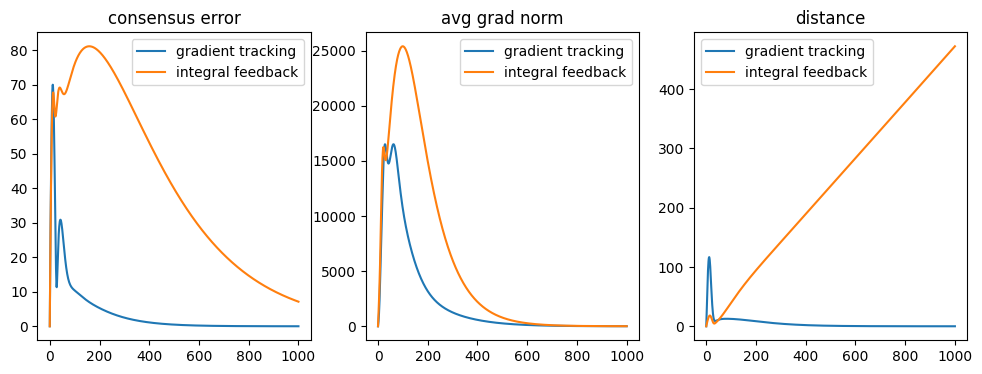

In [ ]:
# len = distance1.shape[0]
# k_range = np.linspace(0,distance1.shape[0], distance1.shape[0])
# # print(k_range.shape)
# # print(distance1.shape)
# # plt.plot(k_range, distance1*k_range)

# # plt.plot(k_range, distance2*k_range)

# # plt.ylim(0, 100)

# f, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(12, 4))
# ax1.plot(k_range, con_error1[:len]*k_range, label='gradient tracking')
# ax1.plot(k_range, (con_error2[:len])*k_range, label='integral feedback')

# ax1.set_title("consensus error")
# ax1.legend()


# ax2.plot(k_range, (grad_norm1[:len])*k_range, label='gradient tracking')
# ax2.plot(k_range, (grad_norm2[:len])*k_range, label='integral feedback')
# ax2.set_title("avg grad norm")
# ax2.legend()

# ax3.plot(k_range, (distance1[:len])*k_range, label='gradient tracking')
# ax3.plot(k_range, (distance2[:len])*k_range, label='integral feedback')
# ax3.set_title("distance")
# ax3.legend()